In [37]:
import warnings
from decimal import Decimal
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

In [38]:
df=pd.read_csv(r'C:/Users/Chandana/Desktop/CKD/final_dataset.csv')

In [39]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,0,0,0,0,...,44,7800,5.2,1,1,0,0,0,0,1
1,1,7,50,1.020,4,0,0,0,0,0,...,38,6000,4.8,0,0,0,0,0,0,1
2,2,62,80,1.010,2,3,0,0,0,0,...,31,7500,4.8,0,1,0,1,0,1,1
3,3,48,70,1.005,4,0,0,1,1,0,...,32,6700,3.9,1,0,0,1,1,1,1
4,4,51,80,1.010,2,0,0,0,0,0,...,35,7300,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,0,0,0,0,...,47,6700,4.9,0,0,0,0,0,0,0
396,396,42,70,1.025,0,0,0,0,0,0,...,54,7800,6.2,0,0,0,0,0,0,0
397,397,12,80,1.020,0,0,0,0,0,0,...,49,6600,5.4,0,0,0,0,0,0,0
398,398,17,60,1.025,0,0,0,0,0,0,...,51,7200,5.9,0,0,0,0,0,0,0


In [40]:
# Separating the dependent and independent variables
y = df['classification']
X = df.drop(['classification','id'], axis = 1)
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48,80,1.020,1,0,0,0,0,0,121,...,15.4,44,7800,5.2,1,1,0,0,0,0
1,7,50,1.020,4,0,0,0,0,0,121,...,11.3,38,6000,4.8,0,0,0,0,0,0
2,62,80,1.010,2,3,0,0,0,0,423,...,9.6,31,7500,4.8,0,1,0,1,0,1
3,48,70,1.005,4,0,0,1,1,0,117,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,1.010,2,0,0,0,0,0,106,...,11.6,35,7300,4.6,0,0,0,0,0,0


Feature Selection using Extra Tree Classifier

In [41]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)


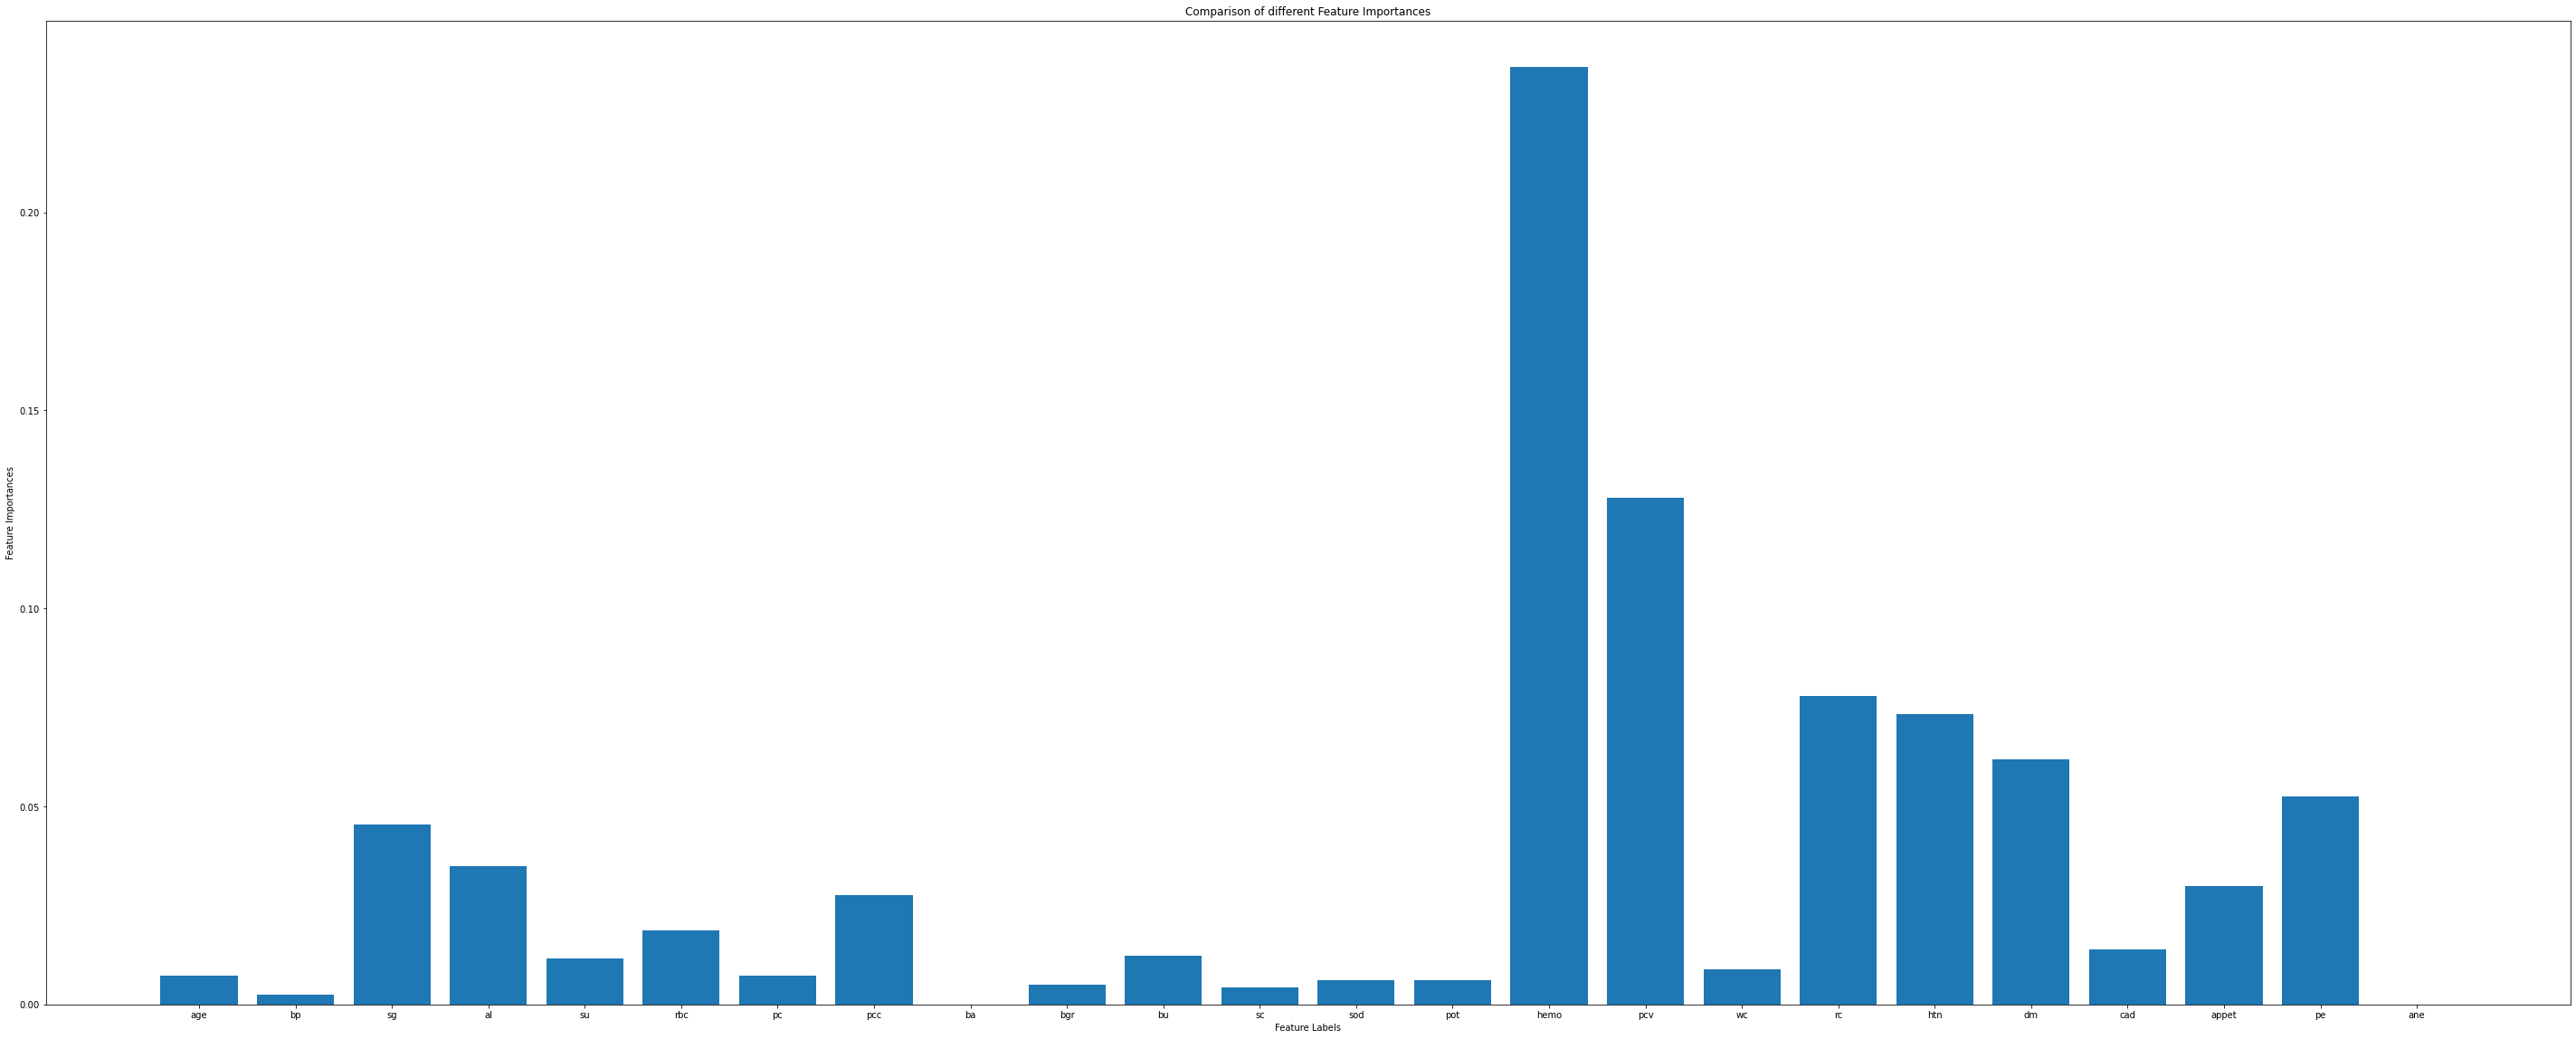

In [42]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(50,20))
plt.bar(X.columns, feature_importance_normalized)

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Identifying top 10 features for pre-diagnosis test

Index(['hemo', 'pcv', 'dm', 'sg', 'htn', 'rc', 'pe', 'al', 'appet', 'pcc'], dtype='object')


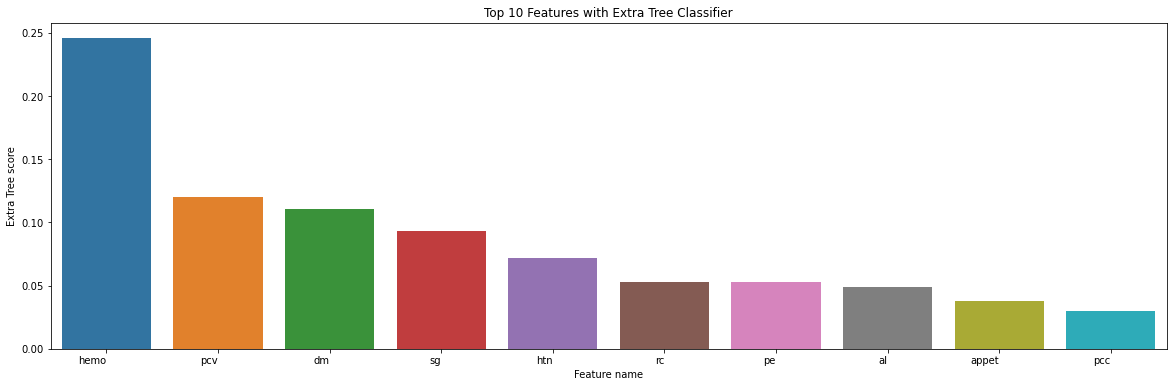

In [43]:
feature_scores=pd.DataFrame(extra_tree_forest.feature_importances_,columns=['Score'],index=X.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])
plt.figure(figsize=(20,6))
print(top10_feature.index)
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Extra Tree Classifier')
p = plt.xlabel('Feature name')
p = plt.ylabel('Extra Tree score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

In [44]:
top10_feature.index

Index(['hemo', 'pcv', 'dm', 'sg', 'htn', 'rc', 'pe', 'al', 'appet', 'pcc'], dtype='object')

In [45]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [46]:
#X.columns
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [47]:
X.head()

,sg,al,pcc,hemo,pcv,rc,htn,dm,appet,pe
0,1.020,1,0,15.4,44,5.2,1,1,0,0
1,1.020,4,0,11.3,38,4.8,0,0,0,0
2,1.010,2,0,9.6,31,4.8,0,1,1,0
3,1.005,4,1,11.2,32,3.9,1,0,1,1
4,1.010,2,0,11.6,35,4.6,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = None)

**Gradient Boosting Classifier**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 100.0 

Confusion Matrix :- 
[[47  0]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**Stochastic Gradient Boosting**

In [50]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))*100}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 100.0
Test Accuracy of Stochastic Gradient Boosting is 99.16666666666667 

Confusion Matrix :- 
[[47  0]
 [ 1 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.99      0.99        73

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**Extra Tree Classifier**

In [51]:
# accuracy score, confusion matrix and classification report of extra tree classifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))*100}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 100.0
Test Accuracy of Extra Trees Classifier is 100.0 

Confusion Matrix :- 
[[47  0]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**KNN**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))*100}")
print(f"Test Accuracy of KNN is {knn_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 95.71428571428572
Test Accuracy of KNN is 95.83333333333334 

Confusion Matrix :- 
[[46  1]
 [ 4 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.99      0.95      0.97        73

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



**Decision Tree Classifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 100.0
Test Accuracy of Decision Tree Classifier is 97.5 

Confusion Matrix :- 
[[47  0]
 [ 3 70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.96      0.98        73

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [54]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [55]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 98.57142857142858
Test Accuracy of Decision Tree Classifier is 97.5 

Confusion Matrix :- 
[[47  0]
 [ 3 70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.96      0.98        73

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



**Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))*100}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 99.28571428571429
Test Accuracy of Random Forest Classifier is 99.16666666666667 

Confusion Matrix :- 
[[46  1]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.99      1.00      0.99        73

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**ADA Boost Classifier**

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))*100}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 100.0
Test Accuracy of Ada Boost Classifier is 100.0 

Confusion Matrix :- 
[[47  0]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**XGBoost**

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))*100}")
print(f"Test Accuracy of XgBoost is {xgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 99.28571428571429
Test Accuracy of XgBoost is 99.16666666666667 

Confusion Matrix :- 
[[46  1]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.99      1.00      0.99        73

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**Cat Boost Classifier**

In [59]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.4811301	total: 1.33ms	remaining: 12ms
1:	learn: 0.3449139	total: 2.63ms	remaining: 10.5ms
2:	learn: 0.2790914	total: 3.99ms	remaining: 9.31ms
3:	learn: 0.2207551	total: 5.17ms	remaining: 7.75ms
4:	learn: 0.1796414	total: 6.26ms	remaining: 6.26ms
5:	learn: 0.1534826	total: 8.35ms	remaining: 5.56ms
6:	learn: 0.1338981	total: 9.5ms	remaining: 4.07ms
7:	learn: 0.1200529	total: 10.6ms	remaining: 2.66ms
8:	learn: 0.1091468	total: 11.6ms	remaining: 1.29ms
9:	learn: 0.0951203	total: 12.4ms	remaining: 0us


In [60]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))*100}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 98.92857142857143
Test Accuracy of Cat Boost Classifier is 98.33333333333333 

Confusion Matrix :- 
[[46  1]
 [ 1 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        73

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**Logistic Regression Classifier**

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(X_train, y_train)

In [62]:
log_acc = accuracy_score(y_test, log.predict(X_test))

print(f"Training Accuracy of Logistic Regression Classifier is {accuracy_score(y_train, log.predict(X_train))*100}")
print(f"Test Accuracy of Logistic Regression Classifier is {log_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, log.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, log.predict(X_test))}")

Training Accuracy of Logistic Regression Classifier is 97.85714285714285
Test Accuracy of Logistic Regression Classifier is 96.66666666666667 

Confusion Matrix :- 
[[46  1]
 [ 3 70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.99      0.96      0.97        73

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



**Linear Discriminant Analysis Classifier**

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
lda_acc = accuracy_score(y_test, log.predict(X_test))

print(f"Training Accuracy of Linear Discriminant Analysis Classifier is {accuracy_score(y_train, lda.predict(X_train))*100}")
print(f"Test Accuracy of Linear Discriminant Analysis Classifier is {lda_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lda.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, lda.predict(X_test))}")

Training Accuracy of Linear Discriminant Analysis Classifier is 95.71428571428572
Test Accuracy of Linear Discriminant Analysis Classifier is 96.66666666666667 

Confusion Matrix :- 
[[47  0]
 [ 4 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       1.00      0.95      0.97        73

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



**GaussianNB**

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
gnb_acc = accuracy_score(y_test, log.predict(X_test))

print(f"Training Accuracy of GaussianNB Classifier is {accuracy_score(y_train, gnb.predict(X_train))*100}")
print(f"Test Accuracy of GaussianNB Classifier is {gnb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gnb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gnb.predict(X_test))}")

Training Accuracy of GaussianNB Classifier is 94.28571428571428
Test Accuracy of GaussianNB Classifier is 96.66666666666667 

Confusion Matrix :- 
[[47  0]
 [ 4 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       1.00      0.95      0.97        73

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



**Support Vector Machine Classifier**

In [67]:
from sklearn import svm
svmc=svm.SVC()
svmc.fit(X_train, y_train)

SVC()

In [68]:
svmc_acc = accuracy_score(y_test, log.predict(X_test))

print(f"Training Accuracy of Support Vector Machine Classifier is {accuracy_score(y_train, svmc.predict(X_train))*100}")
print(f"Test Accuracy of Support Vector Machine Classifier is {svmc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svmc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svmc.predict(X_test))}")

Training Accuracy of Support Vector Machine Classifier is 91.78571428571428
Test Accuracy of Support Vector Machine Classifier is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 4 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.95      0.95      0.95        73

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



# Models Comparison

In [69]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','ADA Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XGBoost', 'Cat Boost', 'Extra Tree Classifier', 
               'Logistic Regression Classifier', 'Linear Discriminant Analysis', 'GaussianNB', 'Support Vector Machine Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc, log_acc, lda_acc, gnb_acc, svmc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,ADA Boost Classifier,1.000000
4,Gradient Boosting Classifier,1.000000
8,Extra Tree Classifier,1.000000
2,Random Forest Classifier,0.991667
5,Stochastic Gradient Boosting,0.991667
6,XGBoost,0.991667
7,Cat Boost,0.983333
1,Decision Tree Classifier,0.975000
9,Logistic Regression Classifier,0.966667
10,Linear Discriminant Analysis,0.966667


In [70]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', 
       title = 'Models Comparison')

In [75]:
from sklearn.ensemble import VotingClassifier
vot_reg = VotingClassifier(estimators=[('adaboost', ada), ('gradientboost', gb), ('extratree', etc)], voting='hard')

In [76]:
vot_reg.fit(X_train, y_train)

VotingClassifier(estimators=[('adaboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                       max_features='auto',
                                                                                       min_samples_split=3,
                                                                                       splitter='random'))),
                             ('gradientboost', GradientBoostingClassifier()),
                             ('extratree', ExtraTreesClassifier())])

In [77]:
y_train_predict=vot_reg.predict(X_train)
y_test_predict=vot_reg.predict(X_test)

In [79]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0

-------Train Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [80]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))
save_model(vot_reg, 'C:/Users/Chandana/Desktop/CKD/ckd_ensemble_model.pkl')